In [89]:
import numpy as np
from scipy.sparse import spdiags , eye
import matplotlib.pyplot as plt
from skimage.io import imread
import scipy

In [82]:
def inpainting(u0,D):
    I=u0.copy().astype(np.float)
    I[I == 0] = np.nan
    he,wi=I.shape
    x1=[]
    for i in range(he):
        y=I[i,:].T
        if (np.isnan(y).sum())>0:
            N= len(y)
            n = np.array([i for i in range(N)]);
            e=np.ones((N,1))
            D=spdiags(np.hstack((e,-2*e,e)).T,[0,1,2],N,N)
            k=np.isfinite(y)
            S=eye(N).toarray()
            S = np.delete(S,np.where(k==False),0)
            Sc=eye(N).toarray()
            r=np.where(k==False)
            r=r[0]
            Sc = Sc[r,:]
            L=sum(~(k))
            v=np.linalg.solve(-(Sc @ (D.T @ D) @ Sc.T), ( Sc @ D.T @ D @ S.T @ y[k]))
            x=np.zeros((N,))
            x[k]=y[k]
            x[np.logical_not(k)]=v
        else:
            x=y;
        try:
            x1=np.row_stack((x1,x.T));
        except:
            x1 = x.T
        x1 = np.array(x1)
   
    x2=[]
    for i in range(he):
        y=I[:,i].T
        if (np.isnan(y).sum())>0:
            N= len(y)
            n = np.array([i for i in range(N)]);
            e=np.ones((N,1))
            D=spdiags(np.hstack((e,-2*e,e)).T,[0,1,2],N,N)
            k=np.isfinite(y)           
            S=eye(N).toarray()
            S = np.delete(S,np.where(k==False),0)
            Sc=eye(N).toarray()
            r=np.where(k==False)
            r=r[0]
            Sc = Sc[r,:]
            L=sum(~(k))
            v=np.linalg.solve(-(Sc @ (D.T @ D) @ Sc.T), ( Sc @ D.T @ D @ S.T @ y[k]))
            x=np.zeros((N,))
            x[k]=y[k]
            x[np.logical_not(k)]=v
        else:
            x=y;
        try:
            x2=np.column_stack((x2,x));
        except:
            x2 = x
        x2 = np.array(x2)
    x=(x1+x2)/2
    return x 

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_10872\1793867052.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I=u0.copy().astype(np.float)


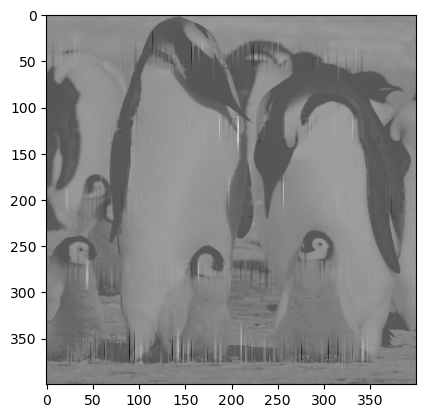

In [83]:
u0=plt.imread('inpaint_img.tif')
D=plt.imread('img_mask.tif')
x=inpainting(u0,D)
plt.imshow(x,cmap='gray')

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_10872\446012870.py:112: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = io.imread('inpaint_img.tif').astype(np.float)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_10872\446012870.py:110: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return (np.array(x1,dtype=float)+(np.array(x2,dtype=float)).T)*0.5


Text(0.5, 1.0, 'Restored image')

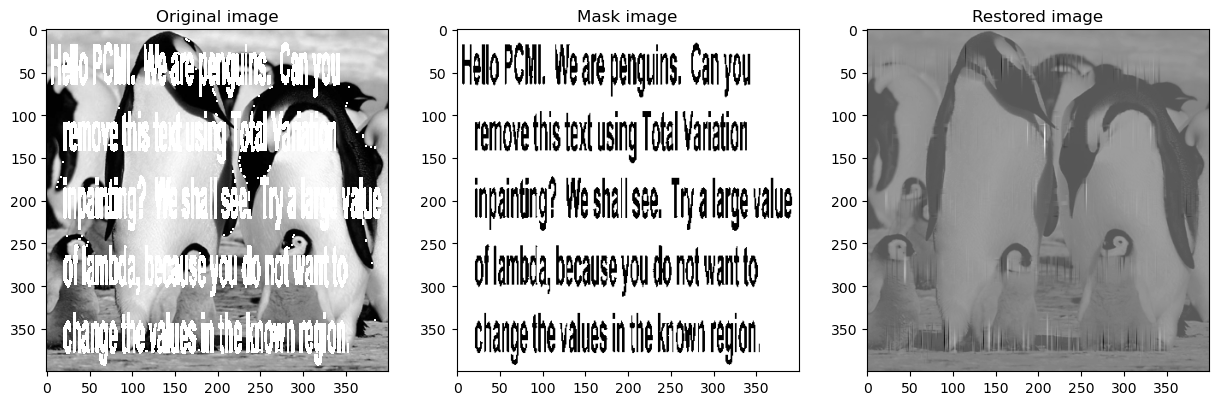

In [90]:

def sparse_diags(Dia,M):
    dia = Dia #{0:1 , 1:2 , 2:3}
    
    #creating a zeros matrix (size = input image size)
    DM = np.zeros([M,M])
    
    
    #this for loop is used to traverse the rows of
    #zeros matrix to append the values in the 
    #appropriate position 
    for i in range(M):
        
        #this forloop is used to get the
        #position and then to add the values 
        #in that particular position 
        for j in dia:
            
            #this if statement is used to 
            #avoid the index bound error
            #if the position give goes beyond 
            #position of matrix with respect to
            #the main diagonal position
            if i+j >= 0 and i+j < M:
                DM[i][i+j] = dia[j]
    return sparse.coo_matrix(DM)

def lsinpaintnew(I):
    
    p = np.where(I == 0) # creating tuple of arrays indicating the incides x equal to 0
    
    I[p] = np.nan # setting the element of x at indices in p to Nan(Not a number)
    
    he, wi = I.shape # assigining the no.of rows and columns w.r.t to x
    
    Dia = {0:1 , 1:-2 , 2:1} # creating dictionary that maps the key 0,1,2 to values 1,-2,1 .
    
    x1 = [] # creating an x1 empyt list to store  


    for i in range(he): # assigned to ith row of X
        
        y = I[i,:]  # assigned to ith row of X
    
        if np.sum(np.isnan(y)) > 0 :# assigned to length of y # checking if there are any Nan values in y
            
            N = len(y)  # assigned to length of y
            
            D = sparse_diags(Dia,N) # constructed using the dictionary and value of N
            
            k = np.isfinite(y) # indices where y is finite and k is boolean array and k logical vector, indexes known values               
            
            S = np.eye(N) # creating a identity matrix of size N
            
            S = S[k, :]  # selects the rows of S corresponding to true values in the boolean array k and  S  sampling matrix                      
            
            Sc = np.eye(N) # creating a identity matrix of size N    
            
            Sc = Sc[~k, :] # selects the roes of sc corresponding to False values in the boolean array k     
            
            v = -np.linalg.solve(Sc @ (D.T @ D) @ Sc.T, (Sc @ D.T @ D @ S.T @ y[k]))  #  v estimated samples 
            
            x = np.zeros((N,1))
            
            x[k] = y[k].reshape(len(k)-len(v),1)
            
            x[~k] = v.reshape(len(v),1)

        else:
            
            x = y
            
        x1.append(list(x))
        
    x2 = [] # creating an X2 empyt list to store 

    for j in range(wi): 
        
        y = np.array(list(map(lambda x:x[j],I)))
    
        if np.sum(np.isnan(y)) > 0: # assigned to length of y # checking if there are any Nan values in y
            
            N = len(y) # assigned to ith row of X

            D = sparse_diags(Dia,N)# constructed using the dictionary and value of N
            
            k = np.isfinite(y) # indices where y is finite and k is boolean array and k logical vector, indexes known values               
            
            S = np.eye(N) # creating a identity matrix of size N
            
            S = S[k, :]   # selects the rows of S corresponding to true values in the boolean array k and  S  sampling matrix                       
            
            Sc = np.eye(N) # creating a identity matrix of size N 
            
            Sc = Sc[~k, :] # selects the rows of sc corresponding to False values in the boolean array k and Sc  complement of S   
            
            v = -np.linalg.solve(Sc @ (D.T @ D) @ Sc.T, (Sc @ D.T @ D @ S.T @ y[k]))# v : estimated samples 
            
            x = np.zeros((N,1))
            
            x[k] = y[k].reshape(len(k)-len(v),1)
            
            x[~k] = v.reshape(len(v),1)

        else:
            x = y
            
        x2.append(list(x))
    
    
    return (np.array(x1,dtype=float)+(np.array(x2,dtype=float)).T)*0.5

image = io.imread('inpaint_img.tif').astype(np.float)

mask_image =Image.open('img_mask.tif')

restored_image = lsinpaintnew(image)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(mask_image, cmap='gray')
ax[1].set_title('Mask image')


ax[2].imshow(restored_image, cmap='gray')
ax[2].set_title('Restored image')
